# Predicting Continuous Target Variables with Regression Analysis pg 309 - Python Machine Learning, S.Raschka & V. Mirjalili

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RANSACRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/rasbt/python-machine-learning-book-2nd-edition/master/code/ch10/housing.data.txt',header=None,sep='\s+')
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [3]:
df.columns = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


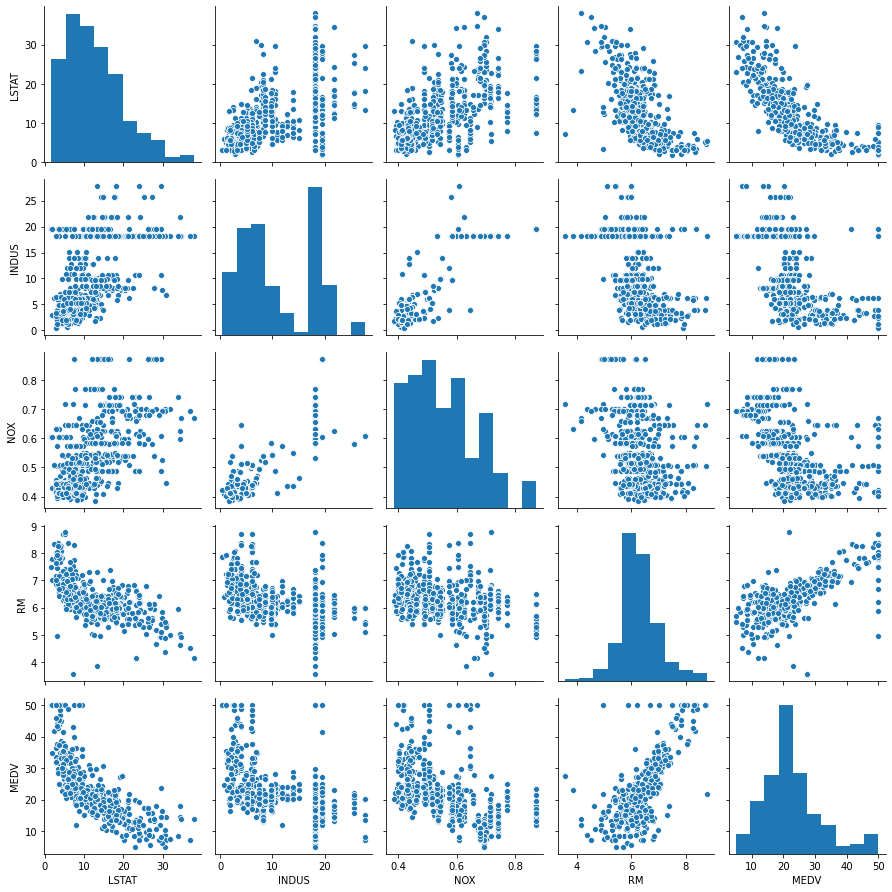

In [4]:
cols = ['LSTAT','INDUS','NOX','RM','MEDV']
sns.pairplot(df[cols],height=2.5)
plt.tight_layout()
plt.show()

## Pearson's r

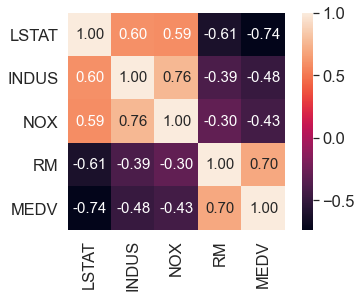

In [5]:
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size':15},yticklabels=cols,xticklabels=cols)
plt.show()

cm = np.corrcoef(df[cols].values)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size':15},yticklabels=cols,xticklabels=cols)
plt.show()

## Home-made linear regression model

In [6]:
#uncomment the prints for better understanding
class LinearRegressionGD(object):
    
    def __init__(self,eta=0.001,n_iter=20):
        self.eta=eta #learning rate
        self.n_iter=n_iter
        
    def fit(self,X,y):
        self.w_=np.zeros(1+X.shape[1])#first value of shape 1 plus 1
        #print('self.w_.shape ',self.w_.shape)
        self.cost_=[]
        
        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y-output)
            #print('errors calculated making the difference between what we just calculated with real y')
            #print('now we are gonna update weights')
            self.w_[1:] += self.eta * X.T.dot(errors)
            #print('new w[1] calculated -> 0.001*X.T.dot(errors)')
            self.w_[0] += self.eta * errors.sum()
            #print('new w[0] calculated -> 0.001*errors.sum()')
            cost = (errors**2).sum() / 2.0
            #print('new cost calculared, sum of the square root of the errors, devided by 2 ',cost)
            self.cost_.append(cost)
        return self
    
    def net_input(self,X):
        #print('output is dot product of the 506 RM values with the 1 value of w, plus the 0 value of w. Result shape 506')
        return np.dot(X, self.w_[1:]) + self.w_[0]#dot product of the 506 RM values with the 1 value of w, plus the 0 value of w. This follows a linear formula
    
    def predict(self,X):
        return self.net_input(X)

In [7]:
X = df[['RM']].values #StandardScaler expects 2d arrays, that's why we added extra []
y = df[['MEDV']].values

sc_x = StandardScaler()
sc_y = StandardScaler()

X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y).flatten()#fit in LinearRegression takes only one dimesional array for y
lr = LinearRegressionGD()
lr.fit(X_std,y_std)

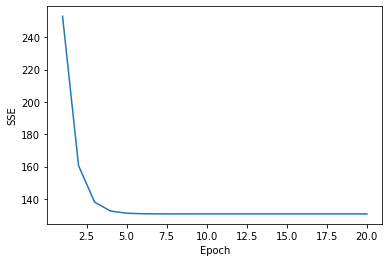

In [8]:
sns.reset_orig()
plt.plot(range(1,lr.n_iter+1),lr.cost_)
plt.ylabel('SSE')
plt.xlabel('Epoch')
plt.show()

In [9]:
def lin_regplot(X,y,model):
    plt.scatter(X,y,c='steelblue',edgecolor = 'white',s=70)
    plt.plot(X,model.predict(X), color='black',lw=2)
    return None

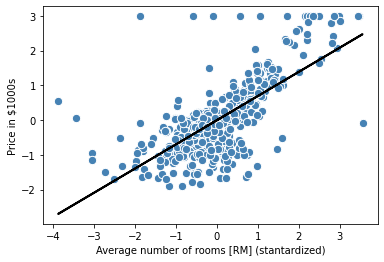

In [10]:
lin_regplot(X_std,y_std,lr)
plt.xlabel('Average number of rooms [RM] (stantardized)')
plt.ylabel('Price in $1000s')
plt.show()

In [11]:
num_rooms_std = sc_x.transform([[5.0]])
price_std = lr.predict(num_rooms_std)
print('Price in $1000s: %.3f'%\
     sc_y.inverse_transform(price_std))


Price in $1000s: 10.840


In [12]:
print('Slope: %.3f' %lr.w_[1])
print('Intercept: %.3f' % lr.w_[0])

Slope: 0.695
Intercept: -0.000


## LinearRegression()

In [13]:
slr = LinearRegression()
slr.fit(X,y)
print('Slope: %.3f' % slr.coef_)
print('Intercept: %.3f' % slr.intercept_)

Slope: 9.102
Intercept: -34.671


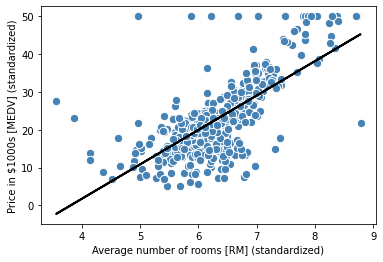

In [14]:
lin_regplot(X,y,slr)
plt.xlabel('Average number of rooms [RM] (standardized)')
plt.ylabel('Price in $1000s [MEDV] (standardized)')
plt.show()

## RANSAC (RANdom SAmple Consensus)

In [15]:
ransac = RANSACRegressor(LinearRegression(), max_trials = 100, min_samples = 50, loss='absolute_loss', residual_threshold=5.0,random_state=0)
ransac.fit(X,y)

RANSACRegressor(base_estimator=LinearRegression(), min_samples=50,
                random_state=0, residual_threshold=5.0)

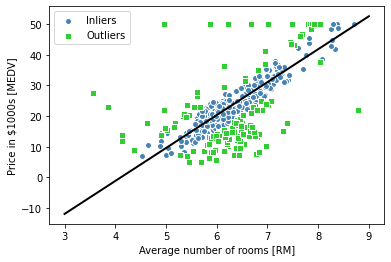

In [16]:
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
line_X = np.arange(3,10,1)
line_y_ransac = ransac.predict(line_X[:,np.newaxis])
plt.scatter(X[inlier_mask], y[inlier_mask],c='steelblue',edgecolor='white',marker='o',label='Inliers')
plt.scatter(X[outlier_mask],y[outlier_mask],c='limegreen',edgecolor='white',marker='s',label='Outliers')
plt.plot(line_X,line_y_ransac,color='black',lw=2)
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000s [MEDV]')
plt.legend(loc='upper left')
plt.show()

In [17]:
print('Slope: %.3f' % ransac.estimator_.coef_)
print('Intercept: %.3f' % ransac.estimator_.intercept_)

Slope: 10.735
Intercept: -44.089


## Residual plot

In [18]:
X = df.iloc[:, :-1].values#without house pricing values
y = df['MEDV'].values
X_train,X_test,y_train,y_test = train_test_split(
                                X,y, test_size = 0.3, random_state = 0)
slr = LinearRegression()
slr.fit(X_train,y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

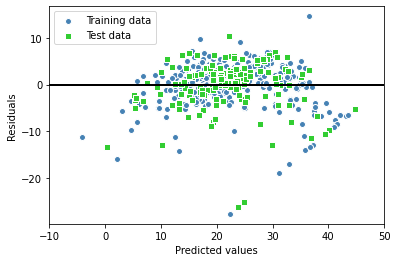

In [19]:
plt.scatter(y_train_pred,y_train_pred-y_train,c='steelblue',marker='o',edgecolor='white',label='Training data')
plt.scatter(y_test_pred,y_test_pred-y_test,c='limegreen',marker='s',edgecolor='white',label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0,xmin=-10,xmax=50,color='black',lw=2)
plt.xlim([-10,50])
plt.show()

In [20]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [21]:
print('MSE train; %.3f, test: %.3f' % (mean_squared_error(y_train,y_train_pred), mean_squared_error(y_test,y_test_pred)))

MSE train; 19.958, test: 27.196


In [22]:
print('R^2 train: %.3f,test:%.3f' % (r2_score(y_train,y_train_pred), r2_score(y_test,y_test_pred)))

R^2 train: 0.765,test:0.673


## Polynomial regression

In [23]:
X = np.array([258.0, 270.0, 294.0, 320.0, 342.0, 368.0, 396.0, 446.0, 480.0, 586.0])\
            [:,np.newaxis]
y = np.array([236.4, 234.4, 252.8, 298.6, 314.2, 342.2, 360.0, 368.0, 391.2, 390.8])

In [24]:
lr = LinearRegression()
pr = LinearRegression()
quadratic = PolynomialFeatures(degree = 2)
X_quad = quadratic.fit_transform(X)

In [25]:
X_quad

array([[1.00000e+00, 2.58000e+02, 6.65640e+04],
       [1.00000e+00, 2.70000e+02, 7.29000e+04],
       [1.00000e+00, 2.94000e+02, 8.64360e+04],
       [1.00000e+00, 3.20000e+02, 1.02400e+05],
       [1.00000e+00, 3.42000e+02, 1.16964e+05],
       [1.00000e+00, 3.68000e+02, 1.35424e+05],
       [1.00000e+00, 3.96000e+02, 1.56816e+05],
       [1.00000e+00, 4.46000e+02, 1.98916e+05],
       [1.00000e+00, 4.80000e+02, 2.30400e+05],
       [1.00000e+00, 5.86000e+02, 3.43396e+05]])

In [26]:
X

array([[258.],
       [270.],
       [294.],
       [320.],
       [342.],
       [368.],
       [396.],
       [446.],
       [480.],
       [586.]])

In [27]:
#linear prediction of linear data (learn and predict with linear X)
lr.fit(X,y) #fit linear regression model on original X to y (learn)
X_fit = np.arange(250,600,10)[:,np.newaxis] #make new array
y_lin_fit = lr.predict(X_fit) #predict with linear regression using new array (use what it learned)

In [28]:
#linear prediction of quadratic data (learn and predict with quadratic X)
pr.fit(X_quad,y) #fit linear regression model on quadratic X to y (learn)
y_quad_fit = pr.predict(quadratic.fit_transform(X_fit)) #predict through linear regression the cuadratic transformation of the new array

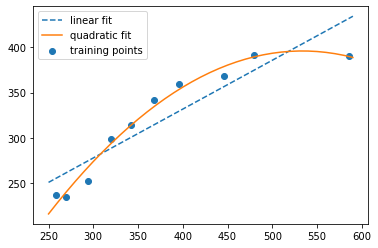

In [29]:
plt.scatter(X, y, label='training points')
plt.plot(X_fit, y_lin_fit, label = 'linear fit', linestyle='--')
plt.plot(X_fit, y_quad_fit, label='quadratic fit', linestyle = 'solid')
plt.legend(loc='upper left')
plt.show()

The polynomial fit captures the relationship between the response and explanatory variable much better than the linear fit

In [30]:
y_lin_pred = lr.predict(X)
y_quad_pred = pr.predict(X_quad)
print('Training MSE linear: %.3f, quadratic: %.3f' % (mean_squared_error(y, y_lin_pred), mean_squared_error(y, y_quad_pred)))

Training MSE linear: 564.868, quadratic: 60.273


In [31]:
print('Training R^2 linear: %.3f, quadratic: %.3f'%(r2_score(y,y_lin_pred), r2_score(y, y_quad_pred)))

Training R^2 linear: 0.833, quadratic: 0.982


## Modeling nonlinear relationships in the Housing dataset

In [32]:
X = df[['LSTAT']].values
y = df['MEDV'].values

regr = LinearRegression()

In [33]:
#create quadratic features
quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)
X_quad = quadratic.fit_transform(X)
X_cubic = cubic.fit_transform(X)

In [34]:
#fit features
X_fit = np.arange(X.min(),X.max(),1)[:,np.newaxis]
#linear regression on linear new array
regr = regr.fit(X,y)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y, regr.predict(X))

In [35]:
regr = regr.fit(X_quad, y)
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))
quadratic_r2 = r2_score(y, regr.predict(X_quad))

In [36]:
regr = regr.fit(X_cubic, y)
y_cubic_fit = regr.predict(cubic.fit_transform(X_fit))
cubic_r2 = r2_score(y, regr.predict(X_cubic))

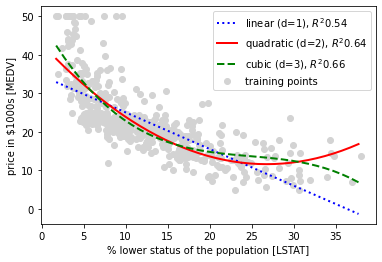

In [37]:
plt.scatter(X,y,label = 'training points', color = 'lightgray')
plt.plot(X_fit, y_lin_fit, label = 'linear (d=1), $R^2%.2f$' % linear_r2, color='blue', lw=2, linestyle=':')
plt.plot(X_fit, y_quad_fit, label='quadratic (d=2), $R^2%.2f$' % quadratic_r2, color = 'red', lw=2, linestyle = '-')
plt.plot(X_fit, y_cubic_fit, label='cubic (d=3), $R^2%.2f$' % cubic_r2, color='green',lw=2 , linestyle = '--')
plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('price in $1000s [MEDV]')
plt.legend(loc='upper right')
plt.show()

In [38]:
X_log = np.log(X)
y_sqrt = np.sqrt(y)


In [39]:
#fit features
X_fit = np.arange(X_log.min()-1, X_log.max()+1, 1)[:,np.newaxis]
regr = regr.fit(X_log, y_sqrt)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y_sqrt, regr.predict(X_log))

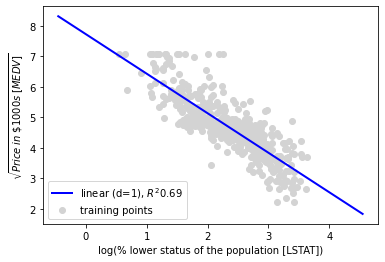

In [40]:
#plot results
plt.scatter(X_log, y_sqrt, label='training points',color='lightgray')
plt.plot(X_fit,y_lin_fit, label='linear (d=1), $R^2%.2f$' % linear_r2, color='blue',lw=2)
plt.xlabel('log(% lower status of the population [LSTAT])')
plt.ylabel('$\sqrt{Price \; in \; \$1000s \; [MEDV]}$')
plt.legend(loc='lower left')
plt.show()

## Decision tree regression

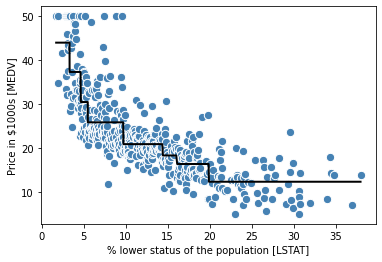

In [41]:
X = df[['LSTAT']].values
y = df['MEDV'].values
tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X,y)
sort_idx = X.flatten().argsort()
lin_regplot(X[sort_idx], y[sort_idx], tree)
plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000s [MEDV]')
plt.show()

## Random forest regression

In [42]:
X = df.iloc[:,:-1] #selecting all rows except target value MEDV
y = df['MEDV'].values
X_train, X_test, y_train, y_test =\
    train_test_split(X,y,test_size=0.4,random_state=1)


In [45]:
forest = RandomForestRegressor(n_estimators=1000,criterion='mse',random_state=1,n_jobs=-1)

In [49]:
forest.fit(X_train,y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train,y_train_pred), mean_squared_error(y_test,y_test_pred)))

MSE train: 1.644, test: 11.085


In [50]:
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train,y_train_pred),r2_score(y_test,y_test_pred)))

R^2 train: 0.979, test: 0.877


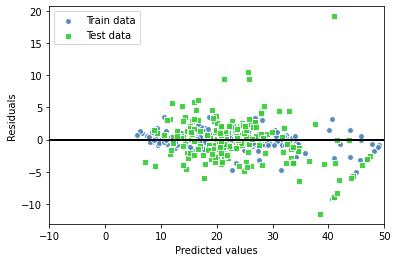

In [51]:
plt.scatter(y_train_pred,y_train_pred-y_train,c='steelblue',edgecolor='white',marker='o',s=35,alpha=0.9,label='Train data')
plt.scatter(y_test_pred, y_test_pred-y_test, c='limegreen',edgecolor='white',marker='s',s=35,alpha=0.9,label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0,xmin=-10,xmax=50,lw=2,color='black')
plt.xlim([-10,50])
plt.show()

The distribution of the residuals does not seem to be compleatly random around the zero center point, indicating that the model is not able to capture all the explanatory information